In [35]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
from scipy import interpolate

In [2]:

df_medida1 = pd.read_excel('Simul X Medidas\Koch_Bowtie\Koch_Bowtie.xlsx', 'Koch_Bowtie_1_Medida_SKY', decimal=',')
df_medida1.dtypes
df_medida1.rename(columns = {'Frequency': 'freq', ' Formatted Data':'S11_MeasSKY1'}, inplace = True)

df_medida1['freq'] = df_medida1['freq'].astype(float)


df_medida1.dtypes

freq            float64
S11_MeasSKY1    float64
dtype: object

In [22]:

df_medida1 = pd.read_excel('Simul X Medidas\Koch_Bowtie\Koch_Bowtie.xlsx', 'INPE', decimal=',')
df_medida1.dtypes
df_medida1.rename(columns = {'Frequency (Hz)': 'freq', 'dB':'S11_MeasINPE'}, inplace = True)

df_medida1['freq'] = df_medida1['freq'].astype(float)


df_medida1

,freq,S11_MeasINPE
0,3.000000e+09,-7.730083
1,3.001000e+09,-7.752378
2,3.002000e+09,-7.774058
3,3.003000e+09,-7.796854
4,3.004000e+09,-7.820727
...,...,...
14996,1.799600e+10,-7.903945
14997,1.799700e+10,-7.937569
14998,1.799800e+10,-7.927970
14999,1.799900e+10,-7.935424


In [8]:
df_medida2 = pd.read_excel('Simul X Medidas\Koch_Bowtie\Koch_Bowtie.xlsx', 'Koch_Bowtie_2_Medida_SKY', decimal=',')
df_medida2.dtypes
df_medida2.rename(columns = {'Frequency': 'freq', ' Formatted Data':'S11_MeasSKY2'}, inplace = True)

df_medida2['freq'] = df_medida2['freq'].astype(float)


df_medida2.dtypes

freq            float64
S11_MeasSKY2    float64
dtype: object

In [3]:
df_medida3 = pd.read_excel('Simul X Medidas\Koch_Bowtie\Koch_Bowtie.xlsx', 'Koch_Bowtie_1_Medida_USP', decimal=',')
df_medida3.dtypes
df_medida3.rename(columns = {'Hz': 'freq', 'S':'S11_MeasUSP1'}, inplace = True)
df_medida3 = df_medida3.drop(['R'], axis= 1)

df_medida3['freq'] = df_medida3['freq'].astype(float)


df_medida3.dtypes

freq            float64
S11_MeasUSP1    float64
dtype: object

In [65]:
df_medida4 = pd.read_excel('Simul X Medidas\Koch_Bowtie\Koch_Bowtie.xlsx', 'Medida_USP_26G5', decimal=',')
df_medida4.dtypes
df_medida4.rename(columns = {'Hz': 'freq', 'S':'S11_MeasUSP2'}, inplace = True)


df_medida4['freq'] = df_medida4['freq'].astype(float)


df_medida4

,freq,S11_MeasUSP2
0,1.000000e+08,0.000211
1,1.082500e+08,0.001368
2,1.165000e+08,0.000773
3,1.247500e+08,0.002081
4,1.330000e+08,-0.001950
...,...,...
3196,2.646700e+10,-14.239793
3197,2.647525e+10,-14.348256
3198,2.648350e+10,-14.473680
3199,2.649175e+10,-14.606821


In [5]:
df_ads = pd.read_excel('Simul X Medidas\Koch_Bowtie\Koch_Bowtie.xlsx', 'Koch_Bowtie_ADS', decimal=',')
df_ads.dtypes
df_ads.rename(columns = {'Frequency / GHz':'freq', 'dB(S11_fitted)':'S11_ADS'}, inplace = True)

# df_ads['freq'] = round(df_cst['freq'],2)*10**9
df_ads.dtypes
# df_ads['S11_ADS']

freq       float64
S11_ADS    float64
dtype: object

In [32]:
df_cst = pd.read_excel('Simul X Medidas\Koch_Bowtie\Koch_Bowtie.xlsx', 'S11 - Koch_simetric_CST', decimal=',')
df_cst.dtypes
df_cst.rename(columns = {'Frequency / GHz':'freq', 'S1,1/abs,dB':'S11_CST'}, inplace = True)

df_cst['freq'] = round(df_cst['freq'],2)*10**9

df_cst['freq']

0       1.000000e+08
1       1.100000e+08
2       1.300000e+08
3       1.400000e+08
4       1.600000e+08
            ...     
996     1.494000e+10
997     1.496000e+10
998     1.497000e+10
999     1.499000e+10
1000    1.500000e+10
Name: freq, Length: 1001, dtype: float64

In [52]:
df_cst = pd.read_excel('Simul X Medidas\Koch_Bowtie\Koch_Bowtie.xlsx', 'CST_40', decimal=',')
df_cst.dtypes
df_cst.rename(columns = {'Frequency / GHz':'freq', 'S1,1/abs,dB':'S11_CST'}, inplace = True)

df_cst['freq'] = round(df_cst['freq'],2)*10**9

df_cst['freq']

0       1.000000e+08
1       1.400000e+08
2       1.800000e+08
3       2.200000e+08
4       2.600000e+08
            ...     
996     3.984000e+10
997     3.988000e+10
998     3.992000e+10
999     3.996000e+10
1000    4.000000e+10
Name: freq, Length: 1001, dtype: float64

In [57]:
# df = pd.merge_ordered(df_cst, df_ads, on='freq')

# df1 = df_ads.merge(df_cst, how= 'outer', on='freq')
# df2 = df_medida2.merge(df_medida1, how= 'outer', on='freq')
# df3 = df_medida3.merge(df_medida4, how= 'outer', on='freq')
# df = df1.merge(df2, how= 'outer', on='freq')
# df = df.merge(df3, how= 'outer', on='freq')

df = df_medida4.merge(df_cst, how = 'outer', on='freq')
df.sort_values(by='freq', inplace=True)

df= df.loc[df['freq']<=26.5e9]

df

,freq,S11_MeasUSP2,S11_CST
0,1.000000e+08,-13.851162,-0.395645
1,1.082500e+08,-14.999712,NaN
2,1.165000e+08,-16.157202,NaN
3,1.247500e+08,-17.308411,NaN
4,1.330000e+08,-18.458578,NaN
...,...,...,...
3842,2.647000e+10,NaN,-14.933917
3197,2.647525e+10,-152.774830,NaN
3198,2.648350e+10,-153.946610,NaN
3199,2.649175e+10,-155.280910,NaN


In [24]:
nfreq = np.arange(30E9, 18E9, 10E6) # % desejada

# f= interpolate.interp1d(df_ads['freq'], df_ads['S11_ADS'])

# y_ads = f(nfreq)

# y_ads

In [25]:
f= interpolate.interp1d(df_cst['freq'], df_cst['S11_CST'])

y_cst = f(nfreq)

y_cst

array([], dtype=float64)

In [12]:
f= interpolate.interp1d(df_medida1['freq'], df_medida1['S11_MeasINPE'])

y_med1 = f(nfreq)

y_med1

array([-7.730083, -7.938804, -8.104391, ..., -4.790687, -4.772244,
       -4.715075])

In [13]:
f= interpolate.interp1d(df_medida2['freq'], df_medida2['S11_MeasSKY2'])

y_med2 = f(nfreq)

y_med2

array([-9.09680731, -9.22015764, -9.34350797, ..., -8.1661981 ,
       -8.17045242, -8.17470674])

In [14]:
f= interpolate.interp1d(df_medida3['freq'], df_medida3['S11_MeasUSP1'])

y_med3 = f(nfreq)

y_med3

array([-8.39979861, -8.48697709, -8.61592983, ..., -4.82766418,
       -4.803111  , -4.77246305])

In [15]:
f= interpolate.interp1d(df_medida4['freq'], df_medida4['S11_MeasUSP2'])

y_med4 = f(nfreq)

y_med4

array([-8.08611656, -8.20720253, -8.32500431, ..., -5.01776128,
       -4.98286753, -4.96046485])

In [16]:
# d= {'freq': nfreq, 'S11_ADS':y_ads,'S11_CST':y_cst, 'S11_MeasSKY1':y_med1, 'S11_MeasSKY2':y_med2, 'S11_MeasUSP1':y_med3, 'S11_MeasUSP2':y_med4}

d= { 'S11_ADS':y_ads,'S11_CST':y_cst, 'S11_MeasINPE':y_med1, 'S11_MeasUSP':y_med4}

df = pd.DataFrame(d)
corr_pearson = df.corr(method='pearson')
corr_kendall = df.corr(method='kendall')
corr_spearman = df.corr(method='spearman')

corr_pearson

,S11_ADS,S11_CST,S11_MeasINPE,S11_MeasUSP
S11_ADS,1.000000,0.838127,0.563764,0.616717
S11_CST,0.838127,1.000000,0.705637,0.787342
S11_MeasINPE,0.563764,0.705637,1.000000,0.947664
S11_MeasUSP,0.616717,0.787342,0.947664,1.000000


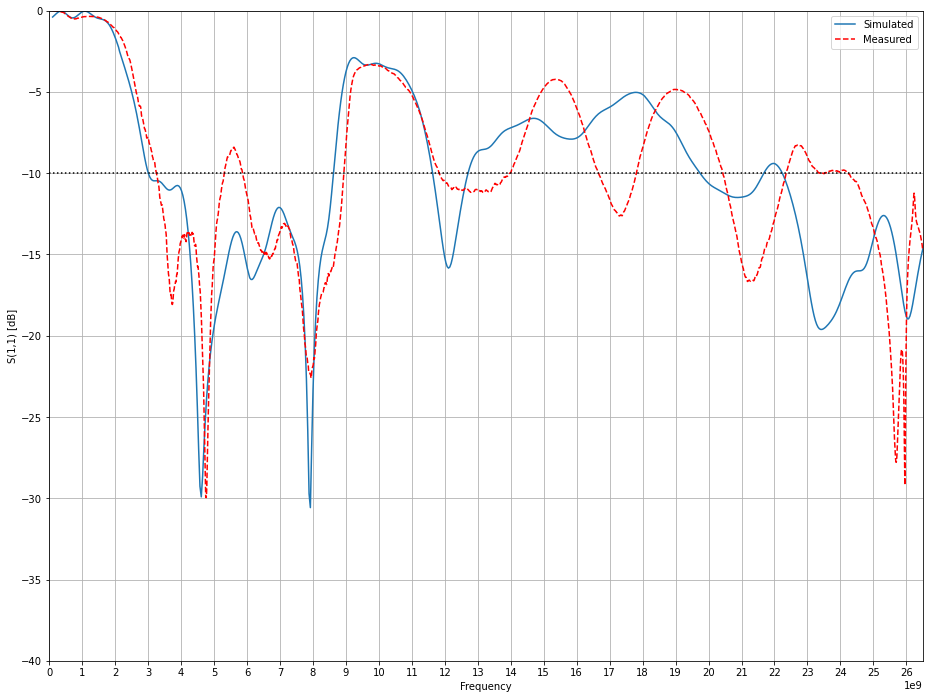

In [69]:
# highest_freq = max([max(df_cst['freq']),max(df_ads['freq'])])



fig, ax = plt.subplots( layout = 'constrained', figsize=(6.4*2,4.8*2))
# ax.plot(df_ads['freq'], df_ads['S11_ADS'], label ='ADS')
ax.plot(df_cst['freq'], df_cst['S11_CST'], label ='Simulated')
# ax.plot(nfreq, y, label ='Med1_inter')
ax.plot(df_medida4['freq'], df_medida4['S11_MeasUSP2'], '--',label ='Measured', color = 'red')
# ax.plot(df_medida2['freq'], df_medida2['S11_MeasSKY2'], label ='SKY 2')
# ax.plot(df_medida3['freq'], df_medida3['S11_MeasUSP1'], '--',label ='USP 1',)
# ax.plot(df_medida4['freq'], df_medida4['S11_MeasUSP2'],'--', label ='USP')


plt.axhline(y=-10, ls=':', c='#000000') #Horizontal Line
plt.ticklabel_format(axis='x', style='sci', scilimits=(9,9))
plt.xticks(range(0, 27*10**9, 1*10**9)) #x scale
ax.set_xlabel('Frequency')  # Add an x-label to the axes.
ax.set_ylabel('S(1,1) [dB]')  # Add a y-label to the axes.
# ax.set_title('S11_Analysis')  # Add a title to the axes.
ax.set(xlim=(0, 26.5*10**9), ylim=(-40, 0))
ax.grid()
ax.legend()

In [43]:
len(df_cst['S11_CST'])

449

<Figure size 3000x2400 with 0 Axes>

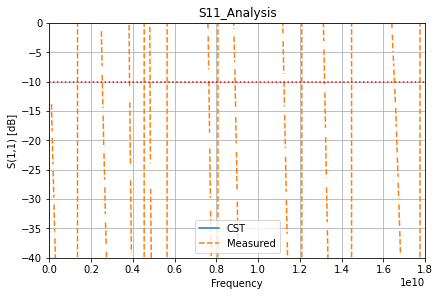

In [60]:
# highest_freq = max(df_cst['freq'])


figure(figsize=(15, 12), dpi=200)
fig, ax = plt.subplots( layout = 'constrained')
ax.plot(df['freq'], df['S11_CST'], label ='CST')
ax.plot(df['freq'], df['S11_MeasUSP2'], '--',label ='Measured')
ax.axhline(y=-10, ls=':', color = 'r')



ax.set_xlabel('Frequency')  # Add an x-label to the axes.
ax.set_ylabel('S(1,1) [dB]')  # Add a y-label to the axes.
ax.set_title('S11_Analysis')  # Add a title to the axes.
ax.set(xlim=(0, 18*10**9), ylim=(-40, 0))
ax.grid()
ax.legend()

In [ ]:
xl = pd.ExcelFile('S11_ADS.xlsx')
sh_names = xl.sheet_names

for name in sh_names:
    print (name)

Sierpinski_simetric
Sierp_Patch_3rd
Sierp_Patch_2rd
MLIN_Slot_Circular_MoM
MLIN_Disc_Monopole_MoM
MLIN_Disc_Monopole_FEM
MLIN_Cardioid_Monopole_MoM
Log_P_Koch_Param_1
Koch_simetric
fit_67
CPW_Disc_Monopole_MoM
CPW_Disc_Monopole_FEM
CPW_Cardioid_Monopole_MoM
Bowtie_import
Planilha1
